### Importações

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

### Base de vendas

In [3]:
produtos = lista_produtos('G:/Drives compartilhados/Planilha de Impostos/BI/Planilha com Impostos.xlsm')
produtos.head()

,ID_Sku
0,74001
1,61580
2,10530
3,18615
4,67857


In [3]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda('7172')

c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [4]:
Venda.tail()

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado_25,promocionado_50
Data,,,,,,,,,,,,,,,,,,
2025-09-22,7172,329.44,329.44,25.0,5.797394,3.218876,3.153956,0,0,0,0,1,0,0,0,5.848509,0,0
2025-09-23,7172,372.20,372.20,18.0,5.919431,2.890372,2.649210,0,0,0,0,0,0,0,1,5.879427,0,0
2025-09-24,7172,369.24,369.24,21.0,5.911447,3.044522,2.628801,0,0,1,0,0,0,0,0,5.903558,0,0
2025-09-25,7172,365.74,365.74,17.0,5.901923,2.833213,2.790288,0,0,0,1,0,0,0,0,5.898374,0,0
2025-09-26,7172,349.30,349.30,3.0,5.855931,1.098612,2.754570,0,0,0,0,0,1,0,0,5.888415,0,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1097.0000  1097.0000  1097.0000    1097.0000     1097.0000   
mean    297.9985    59.0975     5.6913       3.6972        5.6911   
std      32.2793   128.9853     0.1079       0.8132        0.1008   
min     185.3600     0.0000     5.2223      -4.6052        5.3645   
25%     275.7500    24.0000     5.6195       3.1781        5.6223   
50%     293.5300    41.0000     5.6820       3.7136        5.6803   
75%     318.5500    69.0000     5.7638       4.2341        5.7589   
max     381.0100  3191.0000     5.9428       8.0681        5.9173   

       Log_Demanda_7D  
count       1097.0000  
mean           3.7979  
std            0.6827  
min            2.0053  
25%            3.3064  
50%            3.8098  
75%            4.2444  
max            6.9123  


2. VALORES MISSING:
SKU                0
Preco_Listado      0
Preco              0
Dem

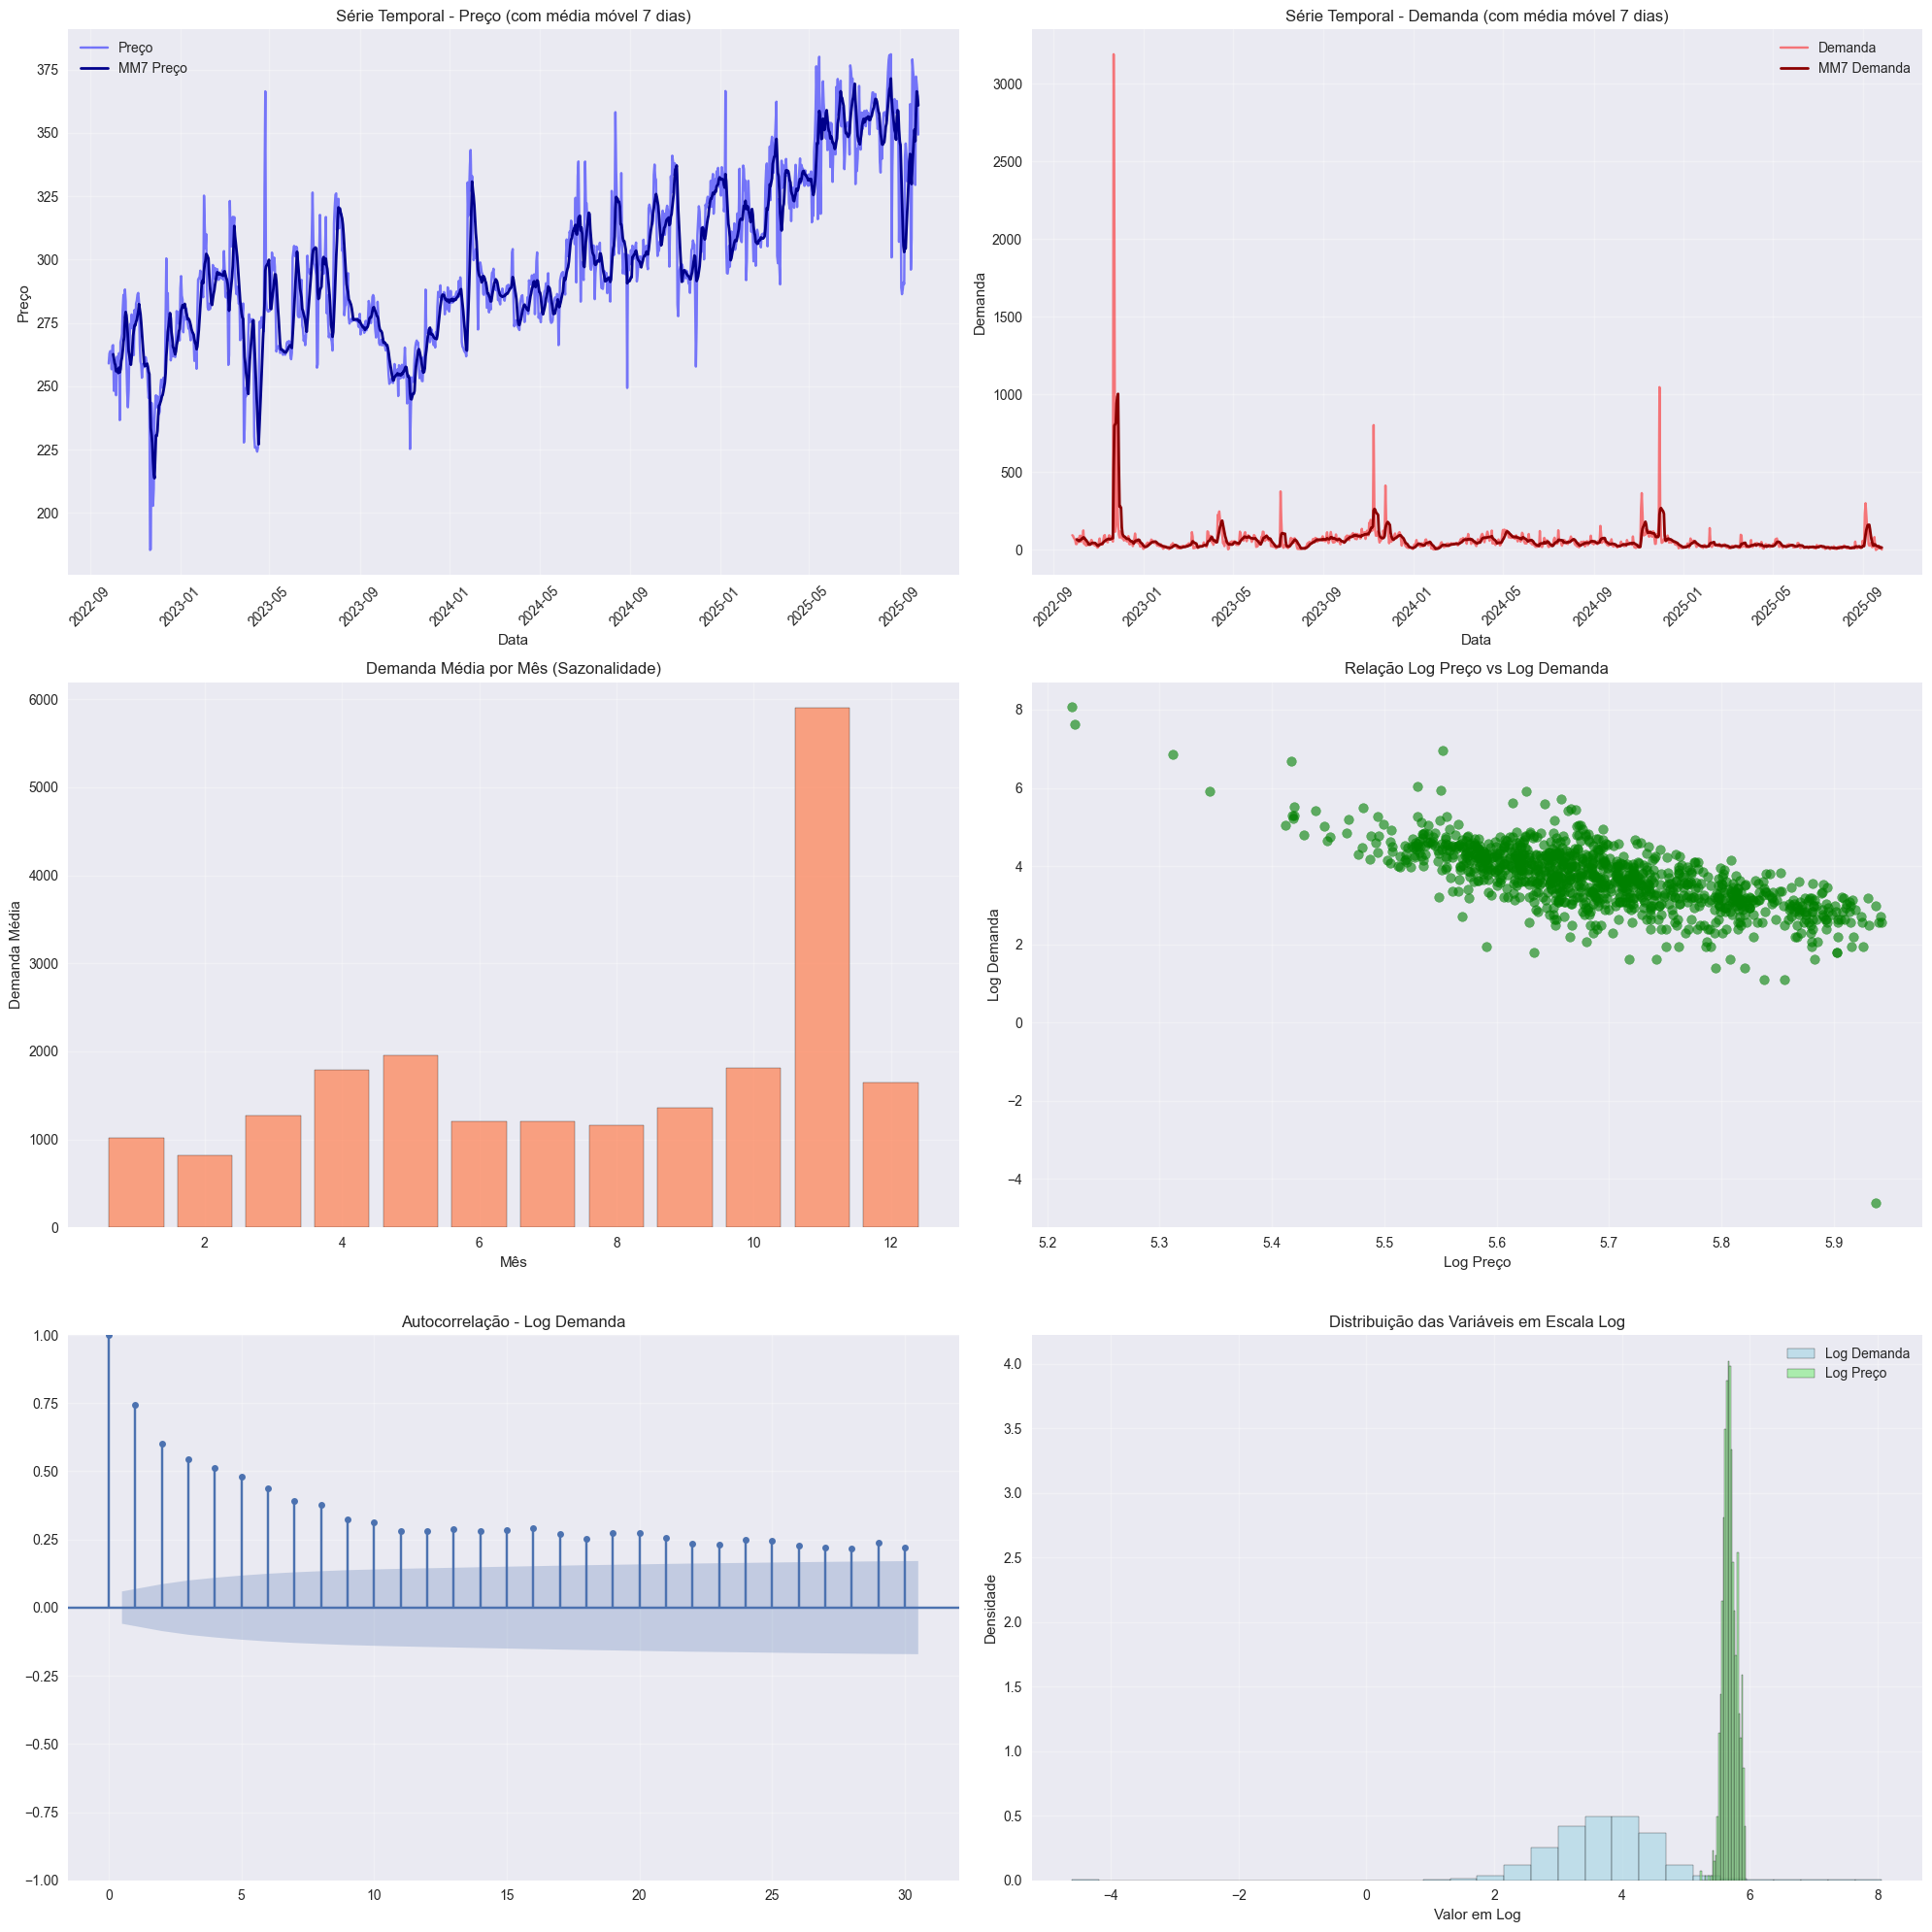

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6949
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2022-09  261.216000    398.0   5.565287     4.365049
 1   2022-10  265.185161   1517.0   5.579159     3.775728
 2   2022-11  250.664000   8615.0   5.518190     4.650235
 3   2022-12  263.371613   1767.0   5.572131     3.920139
 4   2023-01  277.904194   1061.0   5.626527     3.411263
 5   2023-02  293.394286    591.0   5.680940     2.949246
 6   2023-03  283.633548   1231.0   5.644110     3.463641
 7   2023-04  267.952000   2422.0   5.584716     4.070361
 8   2023-05  272.689677   2154.0   5.607218     4.179816
 9   2023-06  289.950000   1572.0   5.668227     3.767679
 10  2023-07  291.666129   1599.0   5.673398     3.480653
 11  2023-08  289.581613   1422.0   5.666728     3.592199
 12  2023-09  275.104667   1975.0   5.616945     4.147224
 13  2023-10  257.608065   2889.0   5.551188     4.519359
 14  2023-11  257.092000   4539.0   5.548512     4.801911
 15  2023-12  277.811613   1675.0   5.626540     3.706341
 16  2024-01  

In [5]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,'7172')

### Modelo: Validação Cruzada de Séries Temporais

In [10]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, '7172', 
    'Log_Preco',                                                                   #Variáveis independentes
    'Quarta-feira', 'Terça-feira'
    ,var_dpd = 'Log_Demanda'                                                       #Variáveis dependentes
    ,n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado_25', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-01-11 a 2023-04-19
   RMSE: 0.6149, WAPE: 14.35%, R²: 0.3539
 Fold 2:
   Período teste: 2023-04-20 a 2023-07-27
   RMSE: 0.5516, WAPE: 11.35%, R²: 0.3496
 Fold 3:
   Período teste: 2023-07-28 a 2023-11-03
   RMSE: 0.5111, WAPE: 10.86%, R²: 0.5223
 Fold 4:
   Período teste: 2023-11-04 a 2024-02-10
   RMSE: 0.6333, WAPE: 13.24%, R²: 0.5861
 Fold 5:
   Período teste: 2024-02-11 a 2024-05-19
   RMSE: 0.6046, WAPE: 12.75%, R²: -0.7764
 Fold 6:
   Período teste: 2024-05-20 a 2024-08-26
   RMSE: 0.5615, WAPE: 13.26%, R²: -0.5604
 Fold 7:
   Período teste: 2024-08-27 a 2024-12-03
   RMSE: 0.7908, WAPE: 15.47%, R²: -0.1288
 Fold 8:
   Período teste: 2024-12-04 a 2025-03-12
   RMSE: 0.4670, WAPE: 10.78%, R²: 0.1848
 Fold 9:
   Período teste: 2025-03-13 a 2025-06-19
   RMSE: 0.4641, WAPE: 11.36%, R²: -0.0740
 Fold 10:
   Período teste: 2025-0

### Modelo: SARIMAX 

In [ ]:
from Functions.FNC_SARIMAX import modelo_sarimax

# Variáveis exógenas
exog_vars_sarimax = [
    'Log_Preco'
]

resultado_sarimax = modelo_sarimax(
    Venda, 
    '7172', 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 7)
)

--- Análise de Estacionariedade para: Demanda ---
Estatística ADF: -10.129091751322203
p-valor: 9.016989172318739e-18
Valores Críticos:
	1%: -3.4363635475753824
	5%: -2.864195245967465
	10%: -2.5681837404258903
Resultado: A série 'Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------
--- Análise de Estacionariedade para: Log_Demanda ---
Estatística ADF: -3.6597561167980297
p-valor: 0.004716179122355623
Valores Críticos:
	1%: -3.4364306491488814
	5%: -2.8642248442477976
	10%: -2.5681995044075987
Resultado: A série 'Log_Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------

--- Treinando Modelo SARIMAX para SKU: 7172 ---
Variável Dependente: Log_Demanda
Variáveis Independentes: ['Log_Preco']
Ordem (p,d,q): (1, 1, 1)
Ordem Sazonal (P,D,Q,s): (1, 1, 1, 7)

--- Sumário do Modelo SARIMAX ---
                                     SARIMAX Results               

### Previsão dos resultados - Modelo de validação cruzada

In [ ]:
from Functions.FNC_Previsoes import criar_predictor, prever_planilha


# Previsão a partir dos dados da planilha de preços para previsão
resultado_plan = prever_planilha(resultados_modelo_principal, 'C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Forecast/Precos_para_previsoes.xlsx')


In [ ]:
resultado_plan

In [13]:
resultado_plan.to_excel('C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Resultados/Resultados_Previsoes.xlsx',index=False)